<a href="https://colab.research.google.com/github/MATHONSIMM/Kurtosis-Heteroscedacity---Msc-work/blob/main/Kurtosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Kurtosis / heteroscedasticity


##Definition

Kurtosis describes a property of a distribution of probabilities. It is actually a statistical parameter which shows the heaviness of the tails as compared to the tails of a normal distribution. It answers the question of whether the distribution which is provided has outliers in the tails.

### Mathematical Definition

Kurtosis is defined as:

\[
\text{Kurtosis} = \frac{n(n+1)}{(n-1)(n-2)(n-3)} \sum \left( \frac{(X_i - \bar{X})^4}{s^4} \right) - \frac{3(n-1)^2}{(n-2)(n-3)}
\]

where:
- \( X_i \) represents each data point,
- \( \bar{X} \) is the mean of the data,
- \( s \) is the standard deviation, and
- \( n \) is the number of data points.

##Description

The tails of the distribution are considered by kurtosis. Outliers, which can greatly bias the results and interpretations of statistical analyses, are reflected by heavy tails. Light tails means less noise points. According to DeCarlo, L.T, for symmetric unimodal distributions, positive kurtosis indicates heavy tails and peakedness relative to the normal distribution, whereas negative kurtosis indicates light tails and flatness.

###Types of Kurtosis:



*   Mesokurtic: A distribution that has kurtosis that is close to that of a normal distribution (kurtosis = 3). It indicates moderate tails.
*   Leptokurtic: A distribution with kurtosis of more than 3, which means that kurtosis and a distribution with heavy tails and a sharp peak.
*   Platykurtic: It has a kurtosis of less than 3 (negative kurtosis) and the tails are light and the peak is flatter.

##Demonstration

To demonstrate the concept of Kurtosis, Apple dataset will be used and pulled from yahoo finance for the past 5 years.

In [ ]:
#Import libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import kurtosis, jarque_bera
from arch import arch_model


In [ ]:
# Pull Apple stock data from Yahoo Finance for the past 5 years
apple = yf.Ticker("AAPL")
data = apple.history(period="5y")

# Select the close prices for analysis
close_prices = data['Close']

###Practical Implications:


*   Modeling and Analysis: When looking at historical financial data, it is important to separate the price levels from the returns:

    - For Volatility Modeling: Daily returns, as they reflect changes in market movements and risk on a daily basis.

*   Risk Management: Large kurtosis in returns will require strong risk management strategies to deal with more than normal movements in price.

In [ ]:
# Calculate daily returns
daily_returns = close_prices.pct_change().dropna()

# Calculate the kurtosis
kurt = kurtosis(daily_returns)
print("Kurtosis of Apple Daily Returns:", kurt)

Kurtosis of Apple Daily Returns: 5.188656647409561


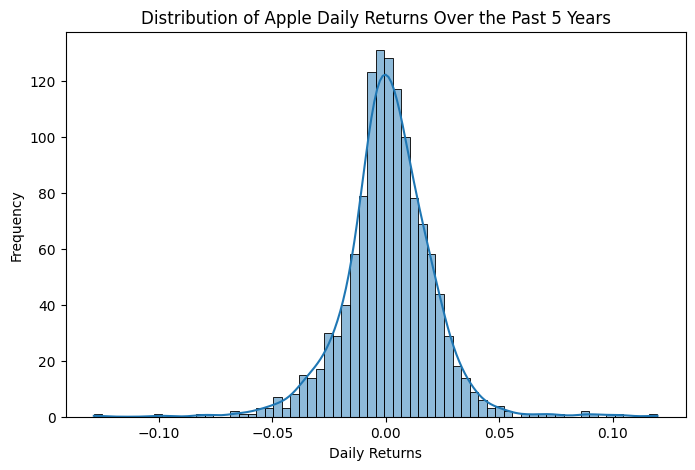

In [ ]:
# Plot the distribution of daily returns
plt.figure(figsize=(8, 5))
sns.histplot(daily_returns, kde=True)
plt.title('Distribution of Apple Daily Returns Over the Past 5 Years')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()

###Kurtosis of Daily Returns: 5.150728651306949.
Please noite that, we got this value at the date we ran the code, of course this value will change as it is pulled from the live hostircal data for the past 5 years.

This large positive kurtosis value simply suggests that the distribution of Apple daily returns has ‘leptokurtic’ tails. A distribution where the tails of the probability distribution are fatter or longer than a normal distribution. It means the daily returns have more extreme values or outliers. High Volatility and More Risk, The daily returns frequently have large fluctuations.

##Diagnosis

###Recognizing Excess Kurtosis and Inability of GARCH Models to Capture kurtosis

**Visual Inspection:**

Using visualization to determine the existence of such excess kurtosis and, more importantly, the GARCH model's inability to handle it, is vital to diagnosis. By plotting the distribution of financial time series (e.g., daily returns) as a histogram with a kernel density estimate (KDE), it is easy to see whether excess kurtosis is present. It can also be seen from the plot that a high kurtosis distribution has more weight in the tails and a steeper peak.

**Statistical Tests:**

The more common approach that statistical tests are taking is to quantify kurtosis and non normality. You can find direct kurtosis calculations in statistical functions or libraries, where the value of >3 means there is a presence of excess kurtosis. Moreover, the Jarque–Bera test tests the composite null hypothesis of kurtosis equal to 3 with the alternative that it is not equal to 3, and skewness equal to 0 with the alternative that it is not equal to zero, since these two are not normality tests, although they are necessary for a normality test to be approved.

In [ ]:
# Pull Apple stock data from Yahoo Finance for the past 5 years
apple = yf.Ticker("AAPL")
data = apple.history(period="5y")
close_prices = data['Close']

# Calculate daily returns
daily_returns = close_prices.pct_change().dropna()

# Calculate kurtosis
kurtosis_value = kurtosis(daily_returns)
print("Kurtosis of Daily Returns:", kurtosis_value)

# Jarque-Bera test
jb_stat, jb_pvalue = jarque_bera(daily_returns)
print("Jarque-Bera Test Statistic:", jb_stat)
print("Jarque-Bera Test p-value:", jb_pvalue)

Kurtosis of Daily Returns: 5.188656647409561
Jarque-Bera Test Statistic: 1411.7166920422821
Jarque-Bera Test p-value: 2.81588761493692e-307


**Model Diagnostics:**

Estimating GARCH parameters, and examining residual of the GARCH model applied to financial time series data. If the residuals are heavy tailed or show high excess kurtosis then it suggests that the GARCH model(s) used above may not have captured all of the excess kurtosis present in the data. Kurtosis may be calculated from standardized residuals normalized using conditional standard deviation, to check the adequacy of the model.

**Alternative Model Fitting:**

One solution for this non-normality would be to fit alternative models that are capable of dealing with excess kurtosis, such as GARCH models assuming heavy-tailed error distributions like the t-distribution or Generalized Error Distribution (GED). Likelihood ratio tests can be used to compare these models with the standard GARCHmodel in terms of their ability to capture the excess kurtosis of the data.

In [ ]:
# Fit GARCH(1,1) model
model = arch_model(daily_returns, vol='Garch', p=1, q=1)
garch_fit = model.fit(disp='off')
print(garch_fit.summary())

# Standardized residuals
standardized_residuals = garch_fit.resid / garch_fit.conditional_volatility

# Kurtosis of standardized residuals
residuals_kurtosis = kurtosis(standardized_residuals)
print("Kurtosis of Standardized Residuals:", residuals_kurtosis)

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3290.90
Distribution:                  Normal   AIC:                          -6573.81
Method:            Maximum Likelihood   BIC:                          -6553.26
                                        No. Observations:                 1258
Date:                Tue, Jun 04 2024   Df Residuals:                     1257
Time:                        20:53:23   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         2.0008e-03  5.077e-04      3.941  8.119e-05 [1.

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003971. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


**Empirical Tests:**

Empirical tests include backtesting the Value at Risk (VaR) and Expected Shortfall (ES) measures generated by the GARCH model to ascertain the extent to which the model can predict extreme events. If the number of VaR violations is even much more than 5% than there is something seriously wrong with the model in a sense that it has unmodelled excess kurtosis and you need to move to some other model or risk management strategy.

##Damage

The absence of excess kurtosis in the time series data of finance, what a GARCH model might fail to embody, a model can lead to the following negative consequences:

**Inaccurate Risk Assessments:**

Ignoring excess kurtosis leads to the flawed risk measures, notably the estimation of VaR and ES. VaR models from GARCH may operate on sub-optimal conditions and from risk perspectives may be myopic due to underestimation of tail risk. This may expose investors and financial institutions to unanticipated losses at times of market turbulence (Bai, J. and Ng, S., 2005).

**Poor Portfolio Management:**

According to Auer, B.R, Ignoring the unmodeled excess kurtosis, leads to misestimation of risk, resulting in inappropriate and inefficient portfolio management actions. Portfolios built from such low-valued risk metrics yield portfolios that are too concentrated in the extreme tails of the assets return distributions, and are thus highly likely to sustain large losses during times of market distress. This can lead to poor resource allocation, lower portfolio performance or both.

**Poor Hedging Techniques:**

GARCH models are very frequently relied upon for volatility estimation in the financial markets as well as in the design of hedging strategies. Nevertheless, the inability to capture extreme higher moments will make hedging strategies less powerful. Failure to provide sufficient coverage when performing hedging positions is a consequence of the use of the wrong estimates of volatility, leading to financial losses for the hedgers concerning the most extreme market instances.

**Increased Systemic Risk:**

Over time the collective effect of the poor risk including incorrect assessments if the risks and as a result bad risk management can lead to an overall market that carries a greater systemic risk. If excess kurtosis were not accounted for properly, the result would be worse market instability — potentially even leading to contagion effects and systemic crises. This creates the kinds of systemic risks that can send the broader economy and financial system into downward spirals, leading to severe economic contractions and widespread financial dysfunction.

##Directions

So, in order to control the skewness clumping and make more accurate financial modeling and risk assessment, let's take a look at some of the methods we have at our disposal for inventory management:

**GARCH with Heavy-Tailed Distributions:**

Use GARCH models with heavy tailed error distributions, (eg Student´s t-distribution, Generalized Error Distribution (GED)). These models are more complex and are designed to capture the excess kurtosis observed in financial time series data so they could give us more accurate estimates of volatility and thus risk.

**Nonlinear Models:**

Investigate the nonlinear models, which the threshold autoregressive (TAR) models or the regime-switching models, where the parameters or the dynamics can change given some threshold or regimes. These models thereby can model non-linearity and regime shifts which are common in financial time series data e.g., periods of volatility clustering and excess kurtosis.

**Machine Learning Techniques:**

See how machine learning machines for financial time series data including neural networks, random forests, or support vector machines. These methods are adaptable to nonlinear relationships, as well as intricate data structures (such as the aforementioned excess kurtosis present in my data) and, taken together, can potentially outperform a traditional econometric model like GARCH in many contexts.

**Robust Estimation Techniques:**

Advising: if these conditions are a concern, think about using a technique of robust to extreme values or departure from normality of the data (M-estimation, for example or quantilinear regression) that is not as sensitive to these things as OLS. Robust estimators are more resilient against the influence of extreme observations ands allow parameters to be more accurately estimated with larger values of excess kurtosis.

##References

1. DeCarlo, L.T., 1997. On the meaning and use of kurtosis. Psychological methods, 2(3), p.292.
2. Angelidis, T., Benos, A. and Degiannakis, S., 2004. The use of GARCH models in VaR estimation. Statistical methodology, 1(1-2), pp.105-128.
3. Purchase, M.A., 2023. Analysing GARCH models across different sample sizes (Doctoral dissertation, Stellenbosch: Stellenbosch University).
4. https://finance.yahoo.com/
5. Bai, J. and Ng, S., 2005. Tests for skewness, kurtosis, and normality for time series data. Journal of Business & Economic Statistics, 23(1), pp.49-60.
6. Auer, B.R., 2015. Superstitious seasonality in precious metals markets? Evidence from GARCH models with time-varying skewness and kurtosis. Applied Economics, 47(27), pp.2844-2859.